In [1]:
%matplotlib inline
import cv2 #read video and images
import numpy as np
from skimage import measure,exposure
from scipy import linalg, ndimage
import math
import sys
from matplotlib import pyplot as plt
from Functions import Utilities as u
from Functions import Global as g
from ipywidgets import interact, interactive, fixed, interact_manual
from Functions import Vision as v

## Path planning
The path planning module is takes as input the obstacles computed by the vision module and returns a shortest path through the obstacles, it performs the following operations to compute the path :

From the obstacles mapped by the vision a visibility graph is computed, dikjstra's algorithm is in turn run on the visibility graph and returns a shortest path, this path is then forwarded to the robot controler.

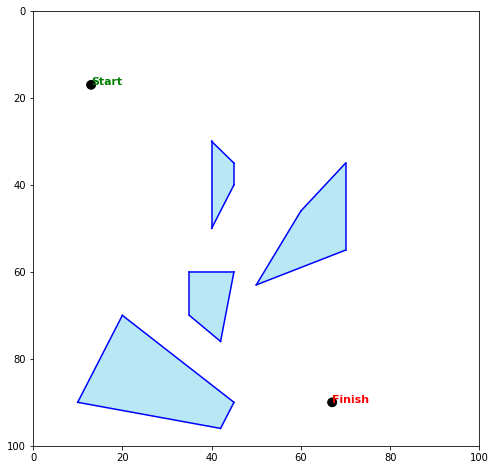

In [12]:
def complexMap():
        polyA = [(40.,30.),
                 (40.,50.),
                 (45.,40.),
                 (45.,35.)]

        polyB = [(70.,35.),
                 (60.,46.),
                 (50.,63.),
                 (70.,55.)]

        polyC = [(35.,60.),
                 (35.,70.),
                 (42.,76.),
                 (45.,60.)]

        polyD = [(20.,70.),
                 (10.,90.),
                 (42.,96.),
                 (45.,90.)]

        return [polyA,polyB,polyC,polyD]
    
start = (13.,17.)
goal = (67.,90.)
    
ut = u.Utilities()
ut.mapPlot(map = complexMap(),start=start, finish=goal)

We construct a visibility graph according to the following algorithm :

```

Let Q be an array containg the start vertex
Let U be an array containing of all vertices of polygons on the map and the goal vertex
Let E be an empty array of edges
Let V be an empty array of vertices

while Q not empty:
    pop h from Q (put the head of Q into h and remove it from Q)
    add h to V
    let N be the set of vertices in U that are neighbors of h
    for all vertices n in N:
        if it is possible to trace a segment from h to n without intersecting a polygon's border
            remove n from U and add it to Q
            append the edge (h,n) to E
            
return the G = (V,E)

```

This is implemented in the Global.py module

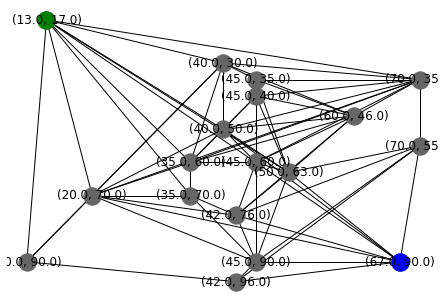

In [13]:
gl = g.Global(complexMap(), start, goal, margin = 3)
graph = gl.computeGraph()
gl.netPlot(graph,start = start, finish = goal)

## Computing the shortest path

The visibility graph is a weighted graph that represents the topology of the map, the weight of the edges are given by the distance between the nodes in space. Computing the physical shortest path for the robot can therefore be performed by finding a shortest path on the weighted visibility graph. This can be performed using Dikjstra's algorithm, if the graph was bigger it may have made sense to use A* to ensure good performance but the graphs here are small enough that it is of no significance.

The computation of the shortest path is implemented in the Global.py module using the networkx library for python. An example of shortest path can be seen below (shortest path plotted in red on the visibility graph).

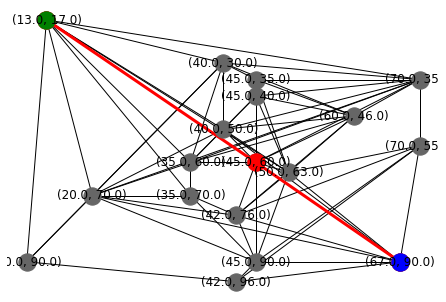

In [14]:
path = gl.returnPath(complexMap(),start,goal)
gl.netPlot(graph,start = start, finish = goal, path = path)

In [16]:
def demo(sx=14.,sy=20.,gx=60.,gy=85.):
    gl.start = (sx,sy)
    gl.finish = (gx,gy)
    gl.plotPath(plotMap=True)
    
w = interactive(demo,sx=(0.,100.),sy=(0.,100.),gx=(0.,100.),gy=(0.,100.))
display(w)

interactive(children=(FloatSlider(value=14.0, description='sx'), FloatSlider(value=20.0, description='sy'), Fl…